<a href="https://colab.research.google.com/github/alirempel/cap-comp215/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Circle Simulation
###*Circle Battle Royale*
###A customizable simulation of circles colliding made using matplotlib. Circles collide, and bigger circles absorb smaller circles until time runs out.

 Author: Alison Rempel

 Date: 2024-02-05


---



###Credits:

https://github.com/alirempel/cap-comp215/blob/main/lessons/algorithms/06-animation-2d.ipynb for the base of the CircleAnimation class

https://saturncloud.io/blog/how-to-draw-a-circle-with-matplotlibpyplot-a-guide-for-data-scientists/  for how to add circles to a matplotlib plot

https://github.com/alirempel/cap-comp215/blob/main/lessons/week03-objects.ipynb for the base of the circle class


---




Below are the imported modules and brief descriptions of where they were used (for the non self explanatory modules)

In [3]:
import matplotlib.pyplot as plt
import math
import itertools # for checking circle collisions
import matplotlib.patches # for drawing circles in Simulation's draw method

# for CircleAnimation class
import time
from matplotlib import animation
from IPython.display import clear_output

##Customizable variables:
* *X* is the size you would like the width of the window of the simulation to be (must be positive INT, recommended below 150 if you don't want to zoom out)
* *Y* is the size you would like the height of the window of the simulation to be (must be positive INT, recommended below 50 if you don't want to zoom out)
* *interval* is the time in seconds for how fast you want the animation to complete a step (must be FLOAT or INT >= 0)
* *battle_time* is how long you want the circles to battle it out for (measured in amount of frames and must be INT >= 0)


  **IMPORTANT NOTE: The below variables are <u>lists</u>, and the lengths must be the same**
* *circle_radii* is a LIST of the sizes of each circle's radius (each entry must be an INT)
* *circle_positions* is a LIST of the starting positions for each circle (each entry must be a **TUPLE** with 2 INTs and within the window size)
* *circle_directions* is a LIST of the circle's directions as angles (each entry must be an INT)


In [36]:
X = 50
Y = 50
interval = 0.1
battle_time = 45

circle_radii = [3,4,2,1]
circle_positions = [(10,10),(40,10),(10,40),(40,40)]
circle_directions = [225,315,135,45]

Run to see if you followed the instructions right! If there's an error, better read them again.

In [30]:
assert type(X) == int and type(Y) == int and X > 0 and Y > 0
assert (type(interval) == float or type(interval) == int) and interval >= 0
assert type(battle_time) == int and battle_time > 0

assert type(circle_radii) == list and type (circle_positions) == list and type(circle_directions) == list
# ^ check circle_radii, circle_directions and circle_postions are lists
assert len(circle_radii) == len(circle_positions) == len(circle_directions) and len(circle_radii) > 0
# ^ check lists are same size

assert [type(circle_directions[i]) == int and type(circle_radii[i]) == int and circle_radii[i] >= 0 for i in range(len(circle_radii))]
# ^ check type of entries in circle_directions and circle_radii
assert [type(circle_positions[i]) == tuple and len(circle_positions[1]) == 2 and type(circle_positions[i][0]) == int and type(circle_positions[i][1]) == int for i in range(len(circle_positions))]
# ^ check type and length of circle_postions and its tuples
assert [circle_positions[i][0] > 0 and circle_positions[i][0] < X and circle_positions[i][1] > 0 and circle_positions[i][1] < Y for i in range(len(circle_positions))]
# ^ check circle_positions are in window

print('You are good to go!')

You are good to go!


## Circle Class
The Circle class represents one circle in the simulation. It's parameters are the circle's radius (float), the circle's starting centre position (two length tuple of ints), and the angular direction its going to go (int).

Its methods are...
* __move__: takes no inputs. It moves the circle one step in the direction specified using trig.
* __distance__: takes another Circle object as input and calculates the distance between the two.
* __intersects__: takes another circle as input and uses distance method to check if the circles are intersecting
* __check_edge__: takes no inputs and checks if any part of the circle is outside of the window and changes the direction if so.

In [31]:

class Circle:
    """ Representation for the data and operations on a circle """

    def __init__(self, radius:float, centre:tuple, direction:int):
      assert len(centre) == 2
      self.radius = radius
      self.centre = centre
      self.direction = direction # angle its heading (degs)
      self.x = round(math.cos(math.radians(direction)),2) # how much to move in the x axis each step
      self.y = round(math.sin(math.radians(direction)),2) # how much to move in the y axis each step

    def move(self):
        """ Move the circle according to current direction """
        x_step = round(math.cos(math.radians(self.direction)),2) # how much to move in the x axis each step
        y_step = round(math.sin(math.radians(self.direction)),2) # how much to move in the y axis each step
        self.centre = (self.centre[0] + x_step, self.centre[1] + y_step)


    def distance(self, other):
        """ Return the distance between this circle's centre and the other one """
        return math.dist(self.centre, other.centre)

    def intersects(self, other):
        """ Return True iff this circle intersects the other one """
        return self.radius + other.radius > self.distance(other)

    def check_edge(self):
      """ If Circle is at edge of window, change direction """
      at_top_edge = (self.centre[1] + self.radius) > Y and self.direction < 180
      at_bottom_edge = (self.centre[1] - self.radius) < 0 and self.direction > 180 and self.direction < 360
      at_left_edge = (self.centre[0] - self.radius) < 0 and self.direction > 90 and self.direction < 270
      at_right_edge = (self.centre[0] + self.radius) > X and (self.direction < 90 or self.direction > 270)

      if at_right_edge:
        self.direction = 180 - self.direction

      elif at_left_edge:
        self.direction = 180 - self.direction

      if at_top_edge:
        self.direction = 360 - self.direction

      elif at_bottom_edge:
        self.direction = 360 - self.direction


### Some tests for the Circle class...

In [38]:
# Test Circle class
def test_circle():
  c1 = Circle(3,(2,4),0)
  c2 = Circle(2,(5,8),30)
  c3 = Circle(10,(100,10),270)

  assert c1 != c2 and c1.radius != c2.radius and c1.centre != c2.centre
  assert c1.distance(c2) == c2.distance(c1)
  assert c1.distance(c2) == 5.0
  assert c1.intersects(c2) == False
  assert c1.centre == (2,4)
  c1.move()
  assert c1.centre == (3.0,4.0)
  assert c1.intersects(c2) == True
  assert c3.direction == 270

  print('Tests passed :D')

test_circle()

Tests passed :D


## Simulation Class
The Simulation class takes a list of Circle objects and performs the operations that allow them to interact.

Its methods are...
* __check_collision__: takes no inputs. It finds every possible pair of circles in the list of circles using itertools.combinations and loops through them and uses the circle's intersect method to check for collisions and eliminates the smaller circle and the bigger circle gains the radius of the smaller one.
* __step__: takes no inputs. It loops through the list of circles and moves each one using the circles move method. It also then checks for collisions with the circles using the check_collision method and collisions with walls using the check_edge method.
* __draw__: takes a set of axes from matplotlib and plots the circles on them. Its essentially one frame of the animation.

In [33]:

class Simulation:
  """ Object that contains a number of circles that manages methods between the circles """

  def __init__(self,circles:list):
    self.circles = circles

  def check_collision(self):
    """ Loop through each unique pair of circles in circle list and check for collisions
    If there is a collision, the bigger circle gains the radius of the smaller one and the smaller one disappears """

    for circle1,circle2 in itertools.combinations(self.circles,2):

      if circle1.intersects(circle2):

        if circle1.radius < circle2.radius:
          circle2.radius += circle1.radius
          circle1.radius = 0

        else:
          circle1.radius += circle2.radius
          circle2.radius = 0


  def step(self):
    """ Loop through circle list and move each one while checking for collisions """

    for circle in self.circles:

      self.check_collision()
      circle.check_edge()
      circle.move()

  def draw(self,axes):
    """ Draw the current state of the simulation
    I figured out how to add the circles from this website:
    https://saturncloud.io/blog/how-to-draw-a-circle-with-matplotlibpyplot-a-guide-for-data-scientists/ """

    axes = plt.axes(xlim =(0, X), ylim = (0,Y)) or plt.gca()

    plot_circles = [axes.add_patch(matplotlib.patches.Circle(circle.centre, circle.radius) ) for circle in self.circles]
    axes.set_aspect('equal')

    axes.set_xticks([]) # hide x tick marks
    axes.set_yticks([]) # hide y tick marks
    axes.set(title= "Circle Battle Royale!")
    plt.show()


##CircleAnimation Class
The CircleAnimation class animates the Simulation object using its step and draw methods. Its parameters are a Simulation object and the number of frames, and optinally, it can take the amount of steps done in each frame and the size of the animation.

Its methods are...
* __animation_step__: Draws one frame for the animation using the Simulation objects's step and draw methods
* __animate__: Loop through the amount of frames given and wipe the screen then draw image again until the loop is done. If there is an interval given, it will wait that long in between each frame.

In [44]:
class CircleAnimation:
    """
      Representation of an animation of a Simulation object using matplotlib
    """

    def __init__(self, model:Simulation, frames, steps_per_frame=1, figsize=(X/10,Y/10)):
        self.model = model
        self.frames = frames
        self.steps_per_frame = steps_per_frame
        self.fig, self.ax = plt.subplots(figsize=figsize) # make the subplot and then make axes the same size as the image's axes
        plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False , bottom = False)  # hide the tick marks and labels
        plt.title(f'{range(self.frames,0,-1)}', loc='right')
        self.ax.title.set_text(f'{range(self.frames,0,-1)}')


    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            for _ in range(self.steps_per_frame):
                self.model.step()
        self.model.draw(self.ax)


    def animate(self, interval):
        """ Animate the model simulation directly in the notebook display block """
        try:
            for i in range(self.frames+1):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()  # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig) # add the figure back to pyplot
                self.ax.set_title(f'{self.frames-i}',loc="right")
                self.animation_step(i)
                plt.show()  # show the current animation frame (pyplot then closes and throws away figure)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

## Time to run the animation!!


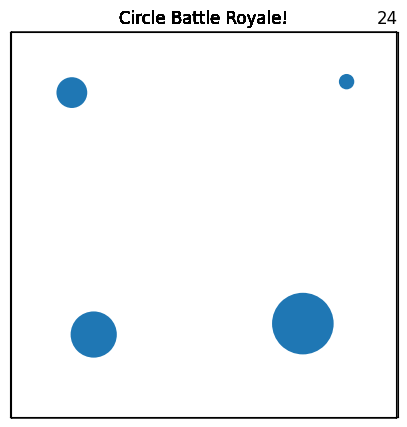

In [45]:
circle_list = [(Circle(rad,pos,dir)) for rad,pos,dir in zip(circle_radii,circle_positions,circle_directions)] # create a list of Circle objects to input in Simulation object

sim = Simulation(circle_list) # create a Simulation object for the CircleAnimation object

CircleAnimation(sim,battle_time).animate(interval)  # run the animation finally!!!